## Election Data Project - Polls and Donors
In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?
<br>
2.) Did the poll results favor Romney or Obama?
<br>
3.) How do undecided voters effect the poll?
<br>
4.) Can we account for the undecided voters?
<br>
5.) How did voter sentiment change over time?
<br>
6.) Can we see an effect in the polls from the debates?

We'll discuss the second data set later on!

Let's go ahead and start with our standard imports:

In [39]:
# For Data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

The data for the polls will be obtained from HuffPost Pollster. You can check their website [here](http://elections.huffingtonpost.com/pollster).

We're going to use the requests module to import some data from the web. For more information on requests, check out the documentation [here](http://docs.python-requests.org/en/latest/).
 
We will also be using StringIO to work with csv data we get from HuffPost. StringIO provides a convenient means of working with text in memory using the file API, find out more about it [here](http://pymotw.com/2/StringIO/)

In [40]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [41]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [42]:
# Set as a dataframe
poll_df = pd.read_csv('2012-general-election-romney-vs-obama.csv')
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [43]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


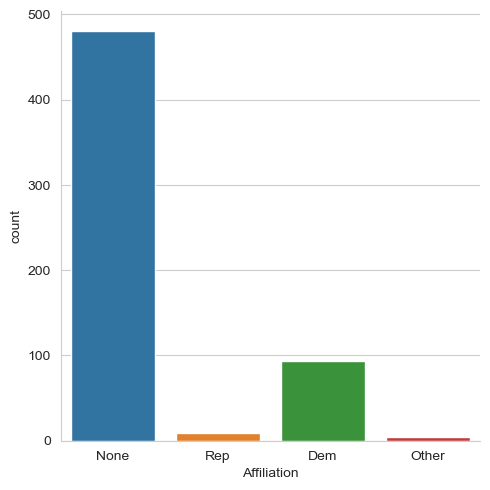

In [44]:
# catplot the affiliation
sns.catplot(x ='Affiliation', data=poll_df,kind='count')

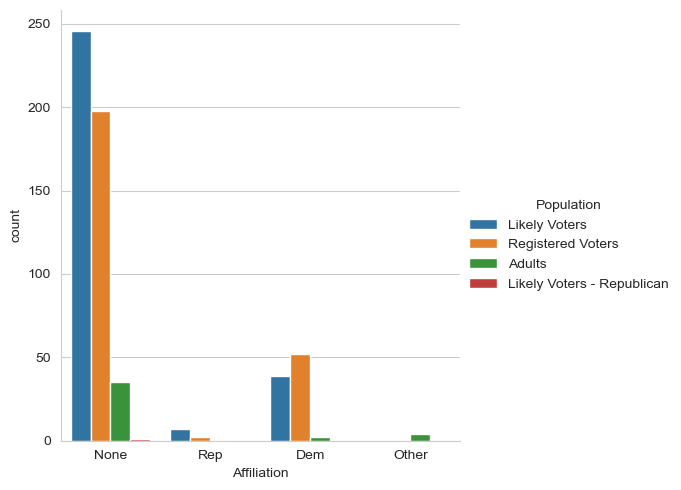

In [45]:
sns.catplot(x = 'Affiliation', data=poll_df, hue='Population',kind='count')
# Srong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled.

In [46]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [69]:
avg = pd.DataFrame(poll_df.mean(numeric_only=True))

avg.drop('Number of Observations', axis=0, inplace=True)
avg.drop('Question Text', axis=0, inplace=True)
avg.drop('Question Iteration', axis=0, inplace=True)

In [70]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [71]:
std = pd.DataFrame(poll_df.std(numeric_only=True))

std.drop('Number of Observations', axis=0, inplace=True)
std.drop('Question Text', axis=0, inplace=True)
std.drop('Question Iteration', axis=0, inplace=True)

std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


<AxesSubplot:>

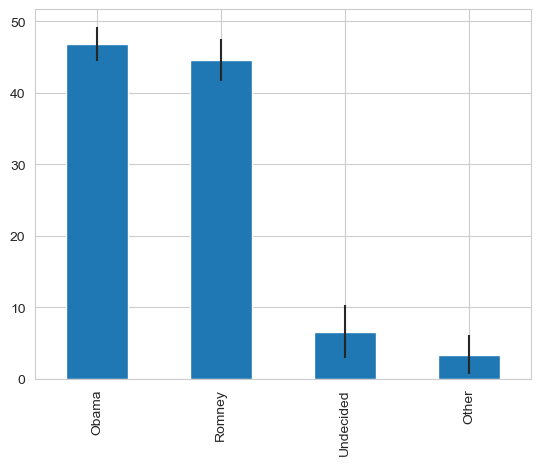

In [72]:
avg.plot(yerr=std, kind='bar', legend=False)
# Sum or average sentiment of all the polls

In [73]:
poll_avg = pd.concat([avg,std],axis=1)

In [74]:
poll_avg
# See the average and standard deviations for the sentiment of the polls to see how close the race was

,0,0
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


<AxesSubplot:xlabel='End Date'>

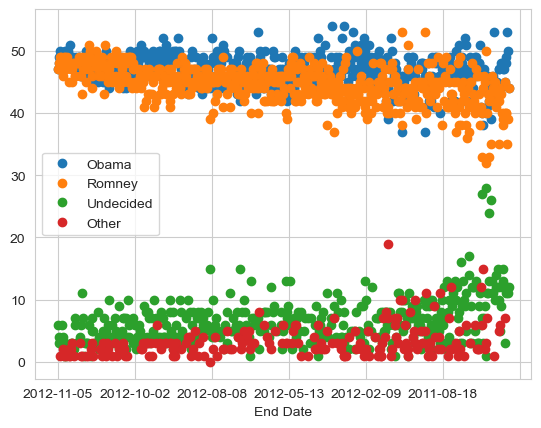

In [75]:
poll_df.plot(x='End Date', y=['Obama','Romney','Undecided','Other'], linestyle='', marker='o')
# Quick time analysis of the voters sentiment

In [76]:
# Plotting the difference between Obama and Romney (in percents + means leaning towards Obama - Romney)
from datetime import datetime

In [77]:
poll_df['Difference'] = (poll_df['Obama'] - poll_df['Romney'])/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [87]:
# Visualize this sentiment in difference changes over time
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

poll_df.drop(columns=['Question Text', 'Question Iteration'], inplace=True)
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,0.09


<AxesSubplot:xlabel='Start Date'>

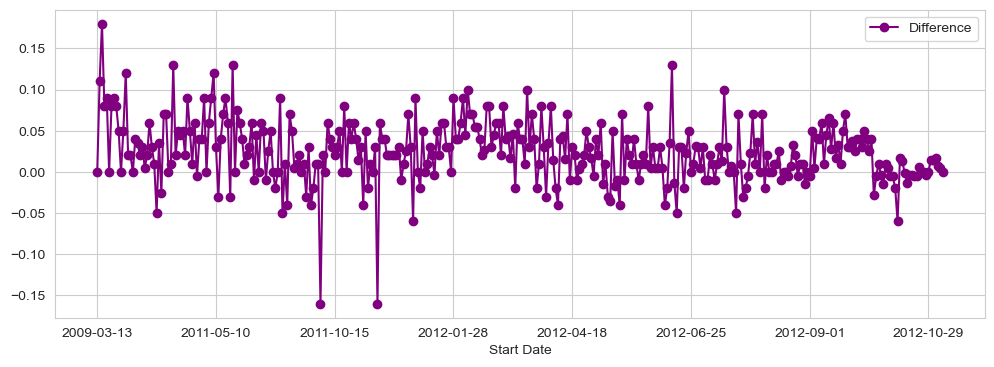

In [88]:
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple')
# Percent change over time, for the most part, Obama was in the lead (positive), aside from two deep dips for Romney

In [92]:
# Plot some markers for specific dates, such as the debate in October of 2012
# In this case were marking the row indices for the October dates with this for loop
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

print (min(xlimit), max(xlimit))

325 352


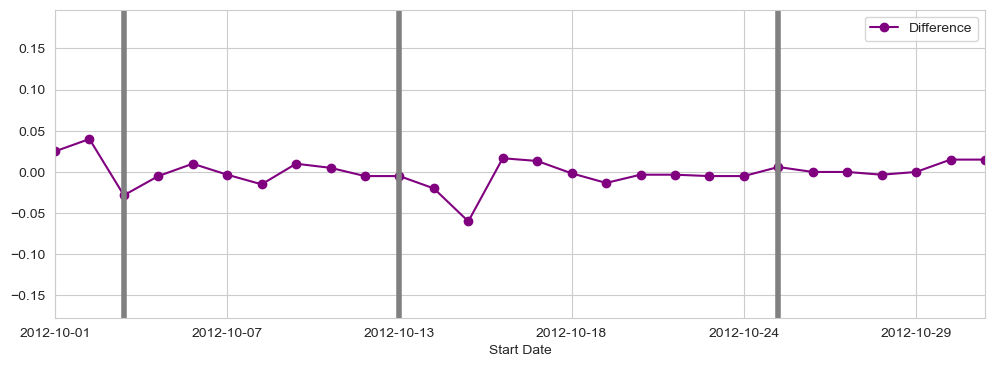

In [94]:
# Plot the differences in the month of October during the debates
# Days of the Debate were 3rd, 11th, and 22nd mark the specific dates 
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple', xlim = (325,352))
# Oct 3rd
plt.axvline(x=325 + 2, linewidth=4, color='grey')
# Oct 11th
plt.axvline(x=325 + 10, linewidth=4, color='grey')
# Oct 22nd
plt.axvline(x=325 + 21, linewidth=4, color='grey')

Can see in the first debate, the voter sentiment grew for Obama, for the second debate it grew for Romney, and on the third debate it can be seen that it stayed relatively stagnant


# Donor Data Set
Let's  take a look at a data set consisting of information on donations to the federal campaign.

This is going to be the biggest data set we've looked at so far. You can download it [here](https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0) , then make sure to save it to the same folder your iPython Notebooks are in.

The questions we will be trying to answer while looking at this Data Set is:

1.) How much was donated and what was the average donation?
<br>
2.) How did the donations differ between candidates?
<br>
3.) How did the donations differ between Democrats and Republicans?
<br>
4.) What were the demographics of the donors?
<br>
5.) Is there a pattern to donation amounts?

In [95]:
# Create a dataframe from the downloaded csv
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.head()

C:\Users\eugen\AppData\Local\Temp\ipykernel_16288\1885775416.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  donor_df = pd.read_csv('Election_Donor_Data.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [96]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [97]:
# Lets take a look at the donation amounts
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [98]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print("The average donation was %.2f with a standard deviation of %.2f" %(don_mean, don_std))

The average donation was 298.24 with a standard deviation of 3749.67


In [102]:
# With such a large std. dev. we should check the top donations/lowest donations to see if that's causing such large deviations
top_donor = donor_df['contb_receipt_amt'].copy()


top_donor.sort_values(inplace=True)

top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [103]:
# Clean the data by taking out the refund amounts (negative values)
top_donor = top_donor[top_donor > 0]

334504          0.01
320138          0.01
349579          0.01
317317          0.01
321408          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [105]:
top_donor.value_counts().head(10)
# Top 10 most common donation amounts

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

<AxesSubplot:>

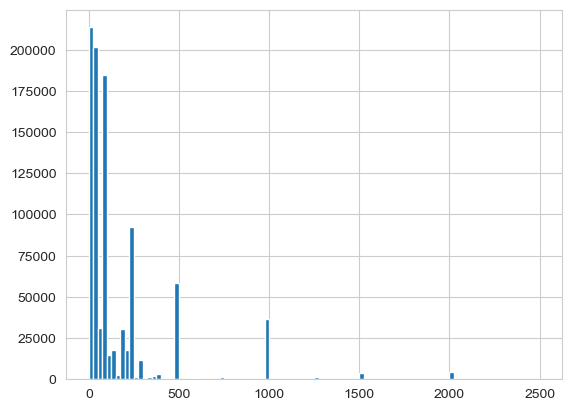

In [107]:
# Plots out the donations from 0 to 2500 
com_don = top_donor[top_donor < 2500]

com_don.hist(bins=100)
# Donation peaks at 'round' number values (500, 1000)

In [109]:
# Separate donations by party (tying in their affiliation)
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Let's go ahead and seperate Obama from the Republican Candidates by adding a Party Affiliation column. We can do this by using map along a dictionary of party affiliations. 

In [112]:
# Using a dictionary or party affiliation we can map each of the candidates affiliation
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Create a new column 'Party' map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

A quick note, we could have done this same operation manually using a for loop, however this operation would be much slower than using the map method.

In [113]:
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [115]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [116]:
# Grouping by the candidates, count how many contributions each candidate received
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [117]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [123]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0 
# Note : Candidate names are the index in this groupby
for don in cand_amount:
    print('The candidate %s raised %.2f dollars.' %(cand_amount.index[i], don))
    print('\n')
    i += 1

The candidate Bachmann, Michelle raised 2711439.29 dollars.


The candidate Cain, Herman raised 7101081.89 dollars.


The candidate Gingrich, Newt raised 12832769.69 dollars.


The candidate Huntsman, Jon raised 3330373.48 dollars.


The candidate Johnson, Gary Earl raised 566961.60 dollars.


The candidate McCotter, Thaddeus G raised 39030.00 dollars.


The candidate Obama, Barack raised 135877427.24 dollars.


The candidate Paul, Ron raised 21009619.83 dollars.


The candidate Pawlenty, Timothy raised 6004819.48 dollars.


The candidate Perry, Rick raised 20305754.00 dollars.


The candidate Roemer, Charles E. 'Buddy' III raised 373009.90 dollars.


The candidate Romney, Mitt raised 88335907.53 dollars.


The candidate Santorum, Rick raised 11043159.31 dollars.




<AxesSubplot:xlabel='cand_nm'>

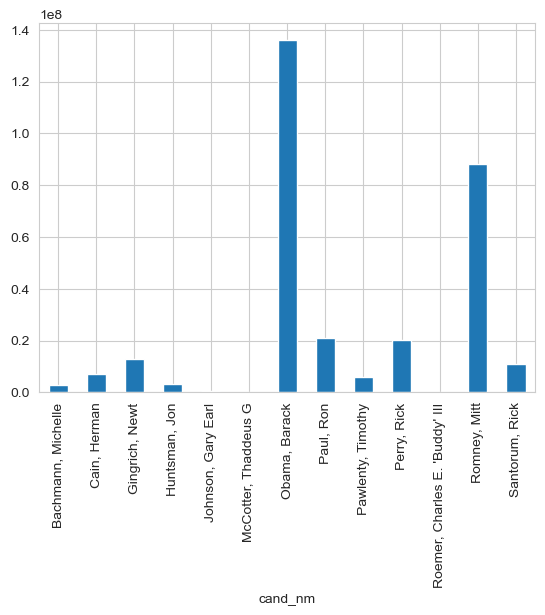

In [124]:
cand_amount.plot(kind='bar')

<AxesSubplot:xlabel='Party'>

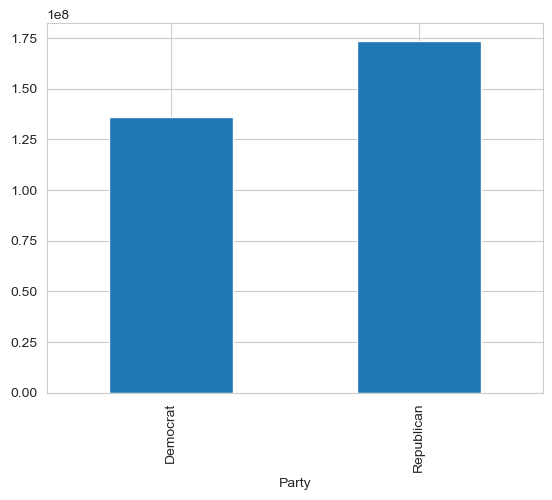

In [125]:
# Since Barack doesn't have to compete with any other Democrats in funding, he's frontrunning donation amount
# How about the difference in party donations?
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the dono_df DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). FInally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession.

In [126]:
# Look at the donations and who they came from (by seeing their occupation)
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index='contbr_occupation',
                                    columns='Party',
                                    aggfunc='sum')

In [127]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [129]:
occupation_df.shape
# Large amount of occupations, a good way to 'trim' any excess is by adding a cutoff for a total contribution amount

(45067, 2)

In [130]:
# Making the cutoff 1000000
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [131]:
occupation_df.shape

(31, 2)

<AxesSubplot:xlabel='contbr_occupation'>

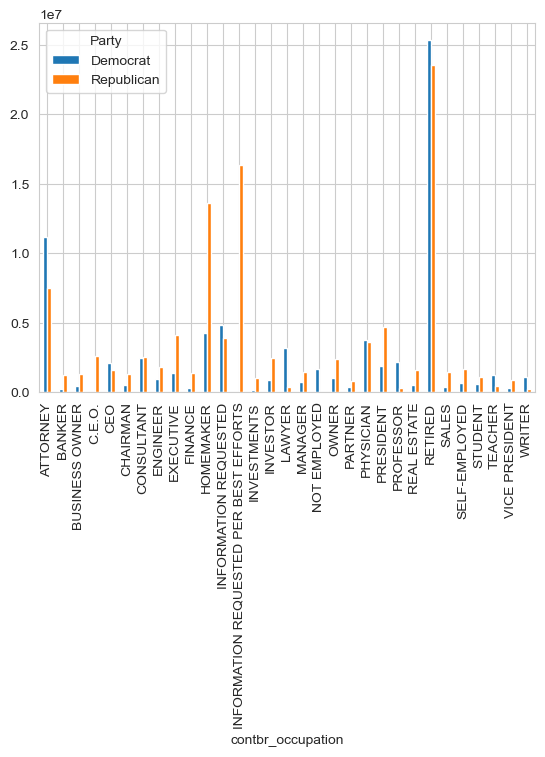

In [134]:
occupation_df.plot(kind='bar')

<AxesSubplot:ylabel='contbr_occupation'>

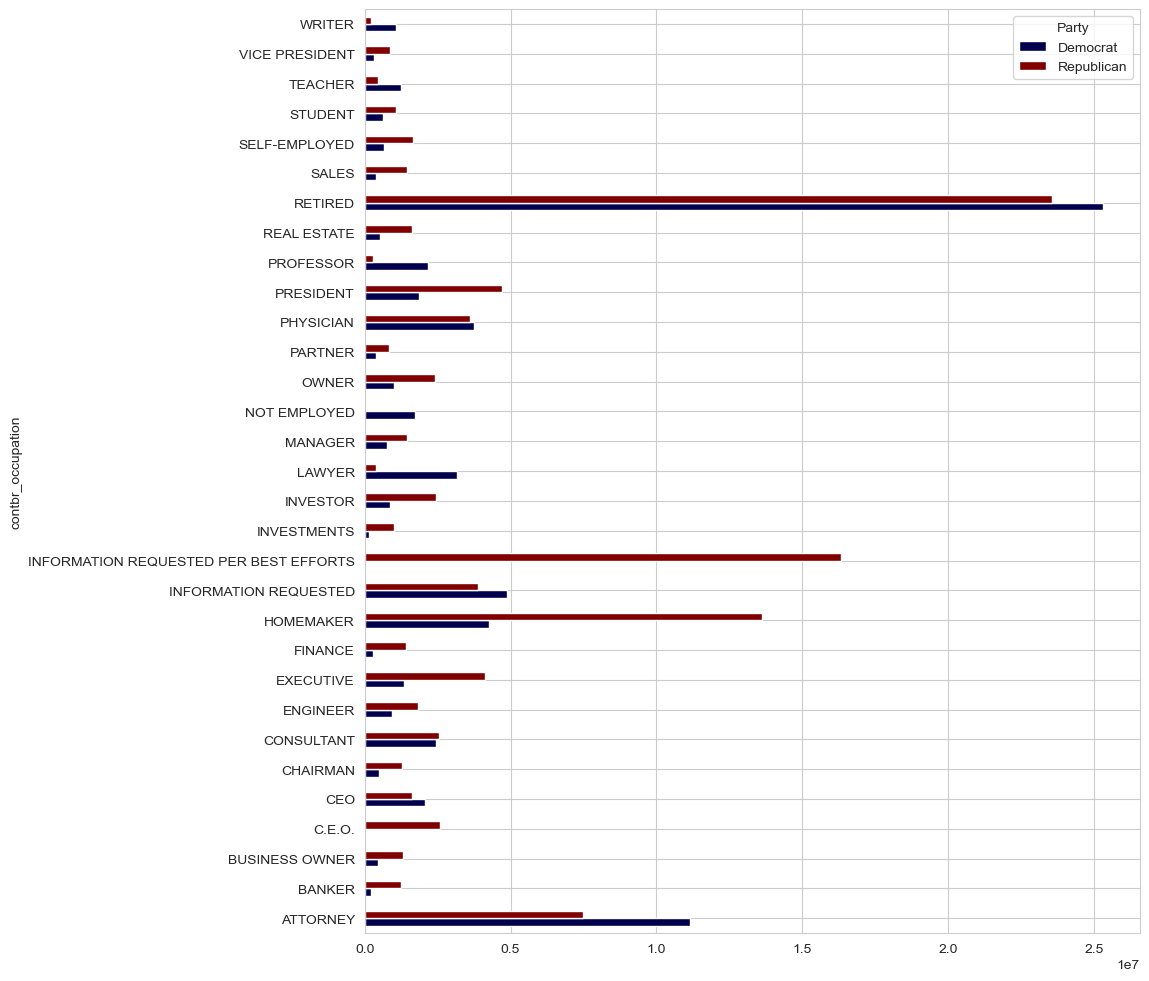

In [137]:
occupation_df.plot(kind='barh', figsize = (10,12),cmap='seismic')

In [142]:
# Clean by removing unavailable occupations, and combining occupations that are the same
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)

KeyError: "['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'] not found in axis"

In [146]:
occupation_df.loc['CEO'] = occupation_df.loc['C.E.O.'] + occupation_df.loc['CEO']
occupation_df.drop('C.E.O.', inplace=True)

C:\Users\eugen\AppData\Local\Temp\ipykernel_16288\1248296417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df.loc['CEO'] = occupation_df.loc['C.E.O.'] + occupation_df.loc['CEO']
C:\Users\eugen\AppData\Local\Temp\ipykernel_16288\1248296417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df.drop('C.E.O.', inplace=True)


<AxesSubplot:ylabel='contbr_occupation'>

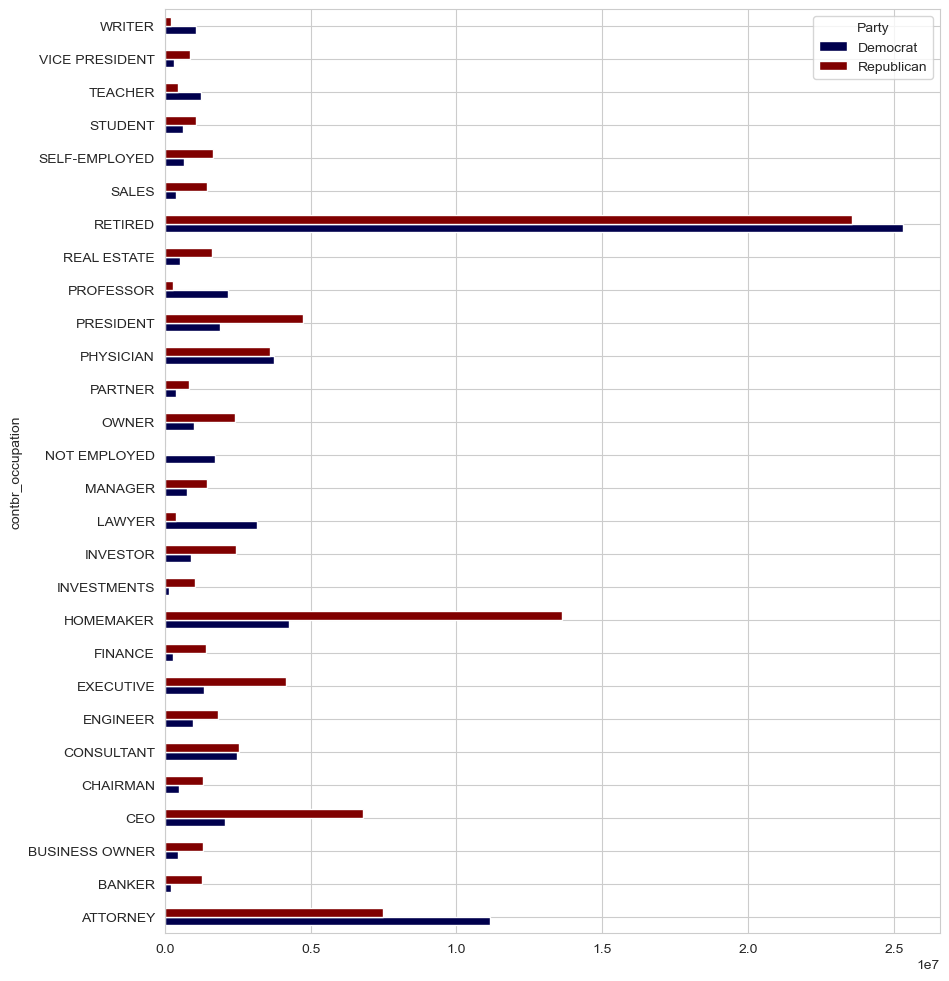

In [147]:
occupation_df.plot(kind='barh', figsize = (10,12),cmap='seismic')